# Marketing Mix Modeling: Capstone 3 Project<br>

# Preprocessing & Generating Baseline Model

## Table of Contents
* [A: Load Files](#a)
* [B: Multicollinearity](#b)
* [C: Train-Test Split](#c)
* [D: Scaling IVs](#d)
* [E: Baseline Models](#e)
* [F: Next Steps](#f)

## A: Load Files <a class="anchor" id="a"></a>

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from statsmodels.stats import outliers_influence
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import qgrid
def view(df_test):
    return qgrid.show_grid(df_test, grid_options={'forceFitColumns': False, 'defaultColumnWidth': 100})

In [2]:
#Open files

sales_media_1 = pd.read_pickle('../b_Data/sales_media_1.pkl')
sales_media_2 = pd.read_pickle('../b_Data/sales_media_2.pkl')

In [3]:
#Inspect files to check import
print(sales_media_1.shape)
sales_media_1.head()

(358, 18)


,units,mrp_USD,discount_USD,promotion,prod_cam,prod_cam_assry,prod_small_ent,prod_gaming_hw,Total_Investment_USD,TV_USD,Digital_USD,Sponsorship_USD,Content_Marketing_USD,Online_Marketing_USD,Affiliates_USD,SEM_USD,Radio_USD,Other_USD
0,96.000000,5701.436667,2323.233333,0.0,3.000000,10.333333,61.666667,10.666667,9954.642857,116.428571,1455.357143,4307.857143,0.0,756.785714,291.071429,2910.714286,0.0,0.0
1,86.666667,5461.070000,2183.356667,0.0,3.000000,10.000000,55.333333,9.666667,9954.642857,116.428571,1455.357143,4307.857143,0.0,756.785714,291.071429,2910.714286,0.0,0.0
2,16.000000,1057.860000,319.670000,0.0,0.666667,0.333333,10.333333,3.333333,9954.642857,116.428571,1455.357143,4307.857143,0.0,756.785714,291.071429,2910.714286,0.0,0.0
3,1541.333333,74333.196667,30680.616667,0.0,53.333333,173.666667,899.666667,325.333333,9954.642857,116.428571,1455.357143,4307.857143,0.0,756.785714,291.071429,2910.714286,0.0,0.0
4,3238.666667,149918.863333,61793.006667,0.0,106.000000,387.333333,1999.666667,543.000000,9954.642857,116.428571,1455.357143,4307.857143,0.0,756.785714,291.071429,2910.714286,0.0,0.0


In [4]:
sales_media_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 357
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   units                  358 non-null    float64
 1   mrp_USD                358 non-null    float64
 2   discount_USD           358 non-null    float64
 3   promotion              358 non-null    float64
 4   prod_cam               358 non-null    float64
 5   prod_cam_assry         358 non-null    float64
 6   prod_small_ent         358 non-null    float64
 7   prod_gaming_hw         358 non-null    float64
 8   Total_Investment_USD   358 non-null    float64
 9   TV_USD                 358 non-null    float64
 10  Digital_USD            358 non-null    float64
 11  Sponsorship_USD        358 non-null    float64
 12  Content_Marketing_USD  358 non-null    float64
 13  Online_Marketing_USD   358 non-null    float64
 14  Affiliates_USD         358 non-null    float64
 15  SEM_US

In [5]:
print(sales_media_2.shape)
sales_media_2.head()

(358, 18)


,units,mrp_USD,discount_USD,promotion,prod_cam,prod_cam_assry,prod_small_ent,prod_gaming_hw,Total_Investment_USD,TV_USD,Digital_USD,Sponsorship_USD,Content_Marketing_USD,Online_Marketing_USD,Affiliates_USD,SEM_USD,Radio_USD,Other_USD
0,96.000000,5701.436667,2323.233333,0.0,3.000000,10.333333,61.666667,10.666667,14390,154,580,6166,0,240,394,6733,0,0
27,3100.333333,199201.566667,99381.633333,0.0,122.333333,426.000000,1947.333333,403.666667,4346,120,1055,6591,0,457,166,2765,0,0
26,3131.333333,204707.683333,100827.803333,0.0,125.000000,438.333333,1966.333333,405.000000,99,18,1390,1274,0,63,299,757,0,0
25,3047.666667,192926.280000,88573.290000,0.0,132.333333,432.000000,1910.333333,379.000000,10815,54,237,21137,0,236,484,384,0,0
24,3155.333333,179788.493333,74405.973333,0.0,125.333333,438.666667,1990.000000,391.666667,14848,7,1807,948,0,3,393,1655,0,0


In [6]:
#Sort sales media by index
sales_media_2 = sales_media_2.sort_index()

In [7]:
sales_media_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 357
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   units                  358 non-null    float64
 1   mrp_USD                358 non-null    float64
 2   discount_USD           358 non-null    float64
 3   promotion              358 non-null    float64
 4   prod_cam               358 non-null    float64
 5   prod_cam_assry         358 non-null    float64
 6   prod_small_ent         358 non-null    float64
 7   prod_gaming_hw         358 non-null    float64
 8   Total_Investment_USD   358 non-null    int64  
 9   TV_USD                 358 non-null    int64  
 10  Digital_USD            358 non-null    int64  
 11  Sponsorship_USD        358 non-null    int64  
 12  Content_Marketing_USD  358 non-null    int64  
 13  Online_Marketing_USD   358 non-null    int64  
 14  Affiliates_USD         358 non-null    int64  
 15  SEM_US

In [8]:
#Convert media investment variables to float
media_cols = ['Total_Investment_USD','TV_USD', 'Digital_USD','Sponsorship_USD','Content_Marketing_USD', 'Online_Marketing_USD','Affiliates_USD', 'SEM_USD', 'Radio_USD','Other_USD']

for col in media_cols:
    sales_media_2[col] = sales_media_2[col].astype(float)
    
sales_media_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 357
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   units                  358 non-null    float64
 1   mrp_USD                358 non-null    float64
 2   discount_USD           358 non-null    float64
 3   promotion              358 non-null    float64
 4   prod_cam               358 non-null    float64
 5   prod_cam_assry         358 non-null    float64
 6   prod_small_ent         358 non-null    float64
 7   prod_gaming_hw         358 non-null    float64
 8   Total_Investment_USD   358 non-null    float64
 9   TV_USD                 358 non-null    float64
 10  Digital_USD            358 non-null    float64
 11  Sponsorship_USD        358 non-null    float64
 12  Content_Marketing_USD  358 non-null    float64
 13  Online_Marketing_USD   358 non-null    float64
 14  Affiliates_USD         358 non-null    float64
 15  SEM_US

## B: Multicollinearity <a class="anchor" id="b"></a>
Test for multicollinearity using Variation Inflation Factor (VIF)
* VIF = 1 → No correlation
* VIF = 1 to 5 → Moderate correlation
* VIF >10 → High correlation <br>
[Code adapted from Toward Data Science Article by Sushmitha Pulagam]('https://towardsdatascience.com/how-to-detect-and-deal-with-multicollinearity-9e02b18695f1')

#### Option 1

In [9]:
#Get features to inspect
features = sales_media_1.drop(columns=['units','prod_cam','prod_cam_assry',
                                       'prod_small_ent','prod_gaming_hw']).columns.to_list()

#filter df to independent variables
features_df_1 = sales_media_1[features]
features_df_1.head()

,mrp_USD,discount_USD,promotion,Total_Investment_USD,TV_USD,Digital_USD,Sponsorship_USD,Content_Marketing_USD,Online_Marketing_USD,Affiliates_USD,SEM_USD,Radio_USD,Other_USD
0,5701.436667,2323.233333,0.0,9954.642857,116.428571,1455.357143,4307.857143,0.0,756.785714,291.071429,2910.714286,0.0,0.0
1,5461.070000,2183.356667,0.0,9954.642857,116.428571,1455.357143,4307.857143,0.0,756.785714,291.071429,2910.714286,0.0,0.0
2,1057.860000,319.670000,0.0,9954.642857,116.428571,1455.357143,4307.857143,0.0,756.785714,291.071429,2910.714286,0.0,0.0
3,74333.196667,30680.616667,0.0,9954.642857,116.428571,1455.357143,4307.857143,0.0,756.785714,291.071429,2910.714286,0.0,0.0
4,149918.863333,61793.006667,0.0,9954.642857,116.428571,1455.357143,4307.857143,0.0,756.785714,291.071429,2910.714286,0.0,0.0


In [10]:
#vif_function
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [outliers_influence.variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores

#Apply function to features df
vif_scores(features_df_1).sort_values(by='VIF Scores', ascending=False)

,Independent Features,VIF Scores
3,Total_Investment_USD,6.030152e+06
6,Sponsorship_USD,1.399732e+06
8,Online_Marketing_USD,2.638707e+05
10,SEM_USD,8.931525e+04
12,Other_USD,6.984915e+04
9,Affiliates_USD,4.067280e+04
5,Digital_USD,2.062159e+04
4,TV_USD,1.774788e+04
11,Radio_USD,1.815943e+03
7,Content_Marketing_USD,1.018131e+03


#### Notes:
* Promotion is the only variable that does not have a high correlation with other independent variables (this may be due to the scale though).
* Total_Investment_USD is substantially higher than others though. Try removing this.

In [11]:
vif_scores(features_df_1.drop(columns='Total_Investment_USD')).sort_values(by='VIF Scores', ascending=False)

,Independent Features,VIF Scores
7,Online_Marketing_USD,2384.267448
8,Affiliates_USD,2104.265502
9,SEM_USD,1190.039908
4,Digital_USD,593.571682
11,Other_USD,487.653725
10,Radio_USD,458.590158
0,mrp_USD,374.152776
1,discount_USD,350.567684
3,TV_USD,126.445819
6,Content_Marketing_USD,61.324868


In [12]:
#Drop Total_Investment_USD from df
sales_media_1 = sales_media_1.drop(columns='Total_Investment_USD')

#### Notes:
* The VIF scores are still very high, but substantially less so without Total_Investment_USD.
* Since Total_Investment_USD is the sum of all media spend variables, and it does not help to answer the business question of how each media channel impacts sales, it can be removed prior to modeling.
* For now, all other variables will remain for the baseline model. We may want to revisit this with model optimization or utilize a model that minimizes multi-collinearity.

#### Option 2

In [13]:
#Get features to inspect
features = sales_media_2.drop(columns=['units','prod_cam','prod_cam_assry',
                                       'prod_small_ent','prod_gaming_hw']).columns.to_list()

#filter df to independent variables
features_df_2 = sales_media_2[features]
features_df_2.head()

,mrp_USD,discount_USD,promotion,Total_Investment_USD,TV_USD,Digital_USD,Sponsorship_USD,Content_Marketing_USD,Online_Marketing_USD,Affiliates_USD,SEM_USD,Radio_USD,Other_USD
0,5701.436667,2323.233333,0.0,14390.0,154.0,580.0,6166.0,0.0,240.0,394.0,6733.0,0.0,0.0
1,5461.070000,2183.356667,0.0,7437.0,127.0,331.0,10149.0,0.0,230.0,61.0,1692.0,0.0,0.0
2,1057.860000,319.670000,0.0,4218.0,13.0,959.0,6512.0,0.0,375.0,522.0,4888.0,0.0,0.0
3,74333.196667,30680.616667,0.0,4171.0,112.0,2751.0,407.0,0.0,1491.0,452.0,4890.0,0.0,0.0
4,149918.863333,61793.006667,0.0,7087.0,41.0,2273.0,3511.0,0.0,1667.0,250.0,3127.0,0.0,0.0


In [14]:
#Apply function to features df
vif_scores(features_df_2).sort_values(by='VIF Scores', ascending=False)

,Independent Features,VIF Scores
1,discount_USD,255.769476
0,mrp_USD,236.709002
2,promotion,4.780093
9,Affiliates_USD,2.024866
7,Content_Marketing_USD,1.981438
5,Digital_USD,1.938450
3,Total_Investment_USD,1.906954
8,Online_Marketing_USD,1.904695
10,SEM_USD,1.868541
4,TV_USD,1.763332


#### Notes:
* Although the baseline variables have very high VIF scores (mrp_USD, discount_USD), they should remain in the models for now since they are control variables.
* For Option 2, Total_Investment_USD does not have a high VIF score, but let's check out the VIF scores with it removed for consistency with Option 1.

In [15]:
vif_scores(features_df_2.drop(columns='Total_Investment_USD')).sort_values(by='VIF Scores', ascending=False)

,Independent Features,VIF Scores
1,discount_USD,254.689680
0,mrp_USD,234.717330
2,promotion,4.776697
6,Content_Marketing_USD,1.981407
8,Affiliates_USD,1.978361
7,Online_Marketing_USD,1.904300
4,Digital_USD,1.860537
9,SEM_USD,1.846423
3,TV_USD,1.741111
5,Sponsorship_USD,1.707421


In [16]:
#Drop Total_Investment_USD from df for consistency with Option 1
sales_media_2 = sales_media_2.drop(columns='Total_Investment_USD')

## C: Train-Test Split <a class="anchor" id="c"></a>

#### Option 1

In [17]:
#Create features variable list
features_1 = sales_media_1.drop(columns=['units','prod_cam','prod_cam_assry','prod_small_ent','prod_gaming_hw'])

#Get target variable ('units')
target_1 = sales_media_1['units']

In [18]:
#Conduct train test split for option 1, using 30% test size, so test sample has > 100 cases
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(features_1, target_1, test_size=0.3, 
                                                    random_state=2)

In [19]:
#Check work
print('Training Features:')
print(X_train_1.columns)
print(X_train_1.shape)
print('Test Features:')
print(X_test_1.columns)
print(X_test_1.shape)
print('Training y:')
print(y_train_1.shape)
print('Test y:')
print(y_test_1.shape)

Training Features:
Index(['mrp_USD', 'discount_USD', 'promotion', 'TV_USD', 'Digital_USD',
       'Sponsorship_USD', 'Content_Marketing_USD', 'Online_Marketing_USD',
       'Affiliates_USD', 'SEM_USD', 'Radio_USD', 'Other_USD'],
      dtype='object')
(250, 12)
Test Features:
Index(['mrp_USD', 'discount_USD', 'promotion', 'TV_USD', 'Digital_USD',
       'Sponsorship_USD', 'Content_Marketing_USD', 'Online_Marketing_USD',
       'Affiliates_USD', 'SEM_USD', 'Radio_USD', 'Other_USD'],
      dtype='object')
(108, 12)
Training y:
(250,)
Test y:
(108,)


#### Option 2

In [20]:
#Create features variable list
features_2 = sales_media_2.drop(columns=['units','prod_cam','prod_cam_assry','prod_small_ent','prod_gaming_hw'])

#Get target variable ('units')
target_2 = sales_media_2['units']

In [21]:
#Conduct train test split for option 1, using 30% test size, so test sample has > 100 cases
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(features_2, target_2, test_size=0.3, 
                                                    random_state=2)

In [22]:
#Check work
print('Training Features:')
print(X_train_2.columns)
print(X_train_2.shape)
print('Test Features:')
print(X_test_2.columns)
print(X_test_2.shape)
print('Training y:')
print(y_train_2.shape)
print('Test y:')
print(y_test_2.shape)

Training Features:
Index(['mrp_USD', 'discount_USD', 'promotion', 'TV_USD', 'Digital_USD',
       'Sponsorship_USD', 'Content_Marketing_USD', 'Online_Marketing_USD',
       'Affiliates_USD', 'SEM_USD', 'Radio_USD', 'Other_USD'],
      dtype='object')
(250, 12)
Test Features:
Index(['mrp_USD', 'discount_USD', 'promotion', 'TV_USD', 'Digital_USD',
       'Sponsorship_USD', 'Content_Marketing_USD', 'Online_Marketing_USD',
       'Affiliates_USD', 'SEM_USD', 'Radio_USD', 'Other_USD'],
      dtype='object')
(108, 12)
Training y:
(250,)
Test y:
(108,)


## D: Scaling IVs<a class="anchor" id="d"></a>
Scale the independent variables using StandardScaler to ensure all variables are on the same scale (not varying dollar amounts and counts)

#### Option 1

In [23]:
#Instantiate the StandardScaler
scaler = StandardScaler()

#Fit the scaler with the training set
scaler.fit(X_train_1)

#Transform the training and test sets using the fit scaler
X_train_1_scaled = scaler.transform(X_train_1)
X_test_1_scaled = scaler.transform(X_test_1)

#Check work
print(X_train_1_scaled.mean())
print(X_test_1_scaled.mean())

-4.1448326252672514e-18
0.11078953341327243


#### Option 2

In [24]:
#Instantiate the StandardScaler
scaler = StandardScaler()

#Fit the scaler with the training set
scaler.fit(X_train_2)

#Transform the training and test sets using the fit scaler
X_train_2_scaled = scaler.transform(X_train_2)
X_test_2_scaled = scaler.transform(X_test_2)

#Check work
print(X_train_2_scaled.mean())
print(X_test_2_scaled.mean())

6.217248937900877e-18
0.0566760587556149


## E: Baseline Models <a class="anchor" id="e"></a>
For baseline, we'll use a simple linear regression model.

#### Train Baseline Model Option 1

In [25]:
#Fit and train linear regression model
lr_model_1 = LinearRegression().fit(X_train_1_scaled, y_train_1)

#Generate predictions
y_train_1_pred = lr_model_1.predict(X_train_1_scaled)
y_test_1_pred = lr_model_1.predict(X_test_1_scaled)

In [26]:
#Model parameters
print('Weight coefficients: ',lr_model_1.coef_)
print('y-intercept: ',lr_model_1.intercept_)

Weight coefficients:  [-1301.57710503  3654.71545606  -269.1777158   -746.24750173
  3811.23317674  1825.92569218 -1616.86423788 -3131.00244841
  4133.71464699 -3199.15793683  2001.79131473 -1554.00020638]
y-intercept:  4390.362666666669


#### Evaluate Baseline Model Option 1

Accuracy plot code adapted from Towards Data Science article by Terence Shin <br> [Source]('https://towardsdatascience.com/building-a-simple-marketing-mix-model-with-ols-571ac3d5b64f![image.png](attachment:image.png)')

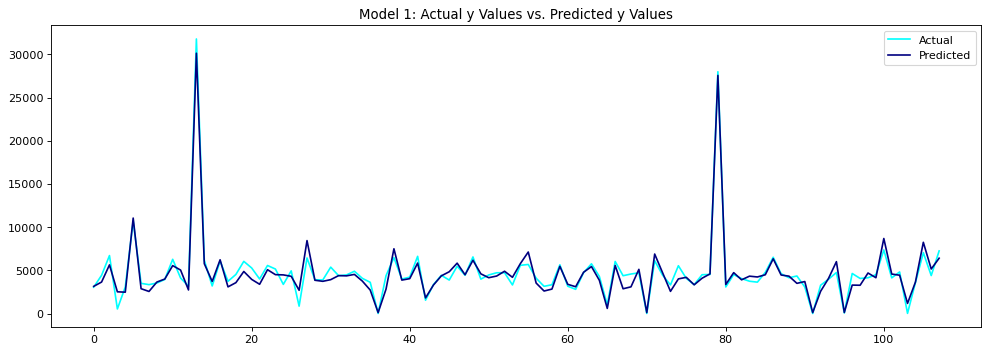

In [27]:
#Plot accuracy

# Creating Line Graph
plt.figure(num=None, figsize=(15, 5), dpi=80)
y1 = y_test_1.to_numpy()
y2 = y_test_1_pred
plt.plot(y1, label = 'Actual', color = 'aqua') 
plt.plot(y2, label = 'Predicted', color = 'navy')
plt.title('Model 1: Actual y Values vs. Predicted y Values')
plt.legend()
plt.show()

In [28]:
# Get r-squared value for training and test sets
r2_lr_1 = r2_score(y_train_1, y_train_1_pred), r2_score(y_test_1, y_test_1_pred)
r2_lr_1

(0.8766014661101883, 0.9609741933501526)

In [29]:
# Get mean absolute error for training and test sets
mae_lr_1 = mean_absolute_error(y_train_1, y_train_1_pred), mean_absolute_error(y_test_1, y_test_1_pred)
mae_lr_1

(575.9053642962609, 586.0775651408597)

In [30]:
#Get mean squared error for training and test sets
mse_lr_1 = mean_squared_error(y_train_1, y_train_1_pred), mean_squared_error(y_test_1, y_test_1_pred)
mse_lr_1

(835005.7894036123, 575567.8455200158)

In [31]:
#Get root mean squared error for training and test sets
#Standard deviation of the residuals
np.sqrt(mse_lr_1)

array([913.78651194, 758.66187826])

Feature importance for the linear regression models will be determined using the regression coeficients. Explanation below sourced from article by Jim Frost. [Source]('https://statisticsbyjim.com/glossary/regression-coefficient/#:~:text=In%20linear%20regression%2C%20coefficients%20are,that%20multiply%20the%20predictor%20values.&text=The%20sign%20of%20each%20coefficient,the%20response%20variable%20also%20increases') 
* "The coefficient value represents the mean change in the response (sales units) given a one unit (std) change in the predictor."
* "A positive sign indicates that as the predictor variable increases, the response variable also increases."
* "A negative sign indicates that as the predictor variable increases, the response variable decreases."
<br>
<br>
Feature importances code below adapted from Feature Importances YouTube video by 
Sefik Ilkin Serengil at 'https://www.youtube.com/watch?v=Y9nN_6sbXkM&t=1009s'

In [32]:
#Create coeficients variable
coefficients = lr_model_1.coef_

#Create feature importances df
feature_importances = pd.DataFrame(coefficients, X_test_1.columns, columns = ['coefficient'])

#Get standard deviations for each feature
stdevs = []
for i in range(len(X_test_1.columns)):
    stdev = X_test_1_scaled[i].std()
    stdevs.append(stdev)
    
#Get avg. y-value
avg_y = y_test_1.mean()

#Create std column for each feature
feature_importances['std'] = np.array(stdevs).reshape(-1,1)
feature_importances['importance'] = feature_importances['std']* feature_importances['coefficient']
feature_importances['perc_change_y'] = ((feature_importances['importance'])/avg_y)*100
feature_importances.reindex(feature_importances['importance'].abs().sort_values(ascending=False).index)

,coefficient,std,importance,perc_change_y
SEM_USD,-3199.157937,1.282448,-4102.753429,-86.617512
discount_USD,3654.715456,0.637546,2330.049474,49.192108
Digital_USD,3811.233177,0.604561,2304.124361,48.644776
Sponsorship_USD,1825.925692,1.229068,2244.187630,47.379389
Affiliates_USD,4133.714647,0.502908,2078.879923,43.889405
Online_Marketing_USD,-3131.002448,0.605411,-1895.544358,-40.018817
Content_Marketing_USD,-1616.864238,0.576706,-932.454521,-19.686021
Radio_USD,2001.791315,0.458549,917.919149,19.379150
mrp_USD,-1301.577105,0.619172,-805.900304,-17.014203
Other_USD,-1554.000206,0.385840,-599.595454,-12.658686


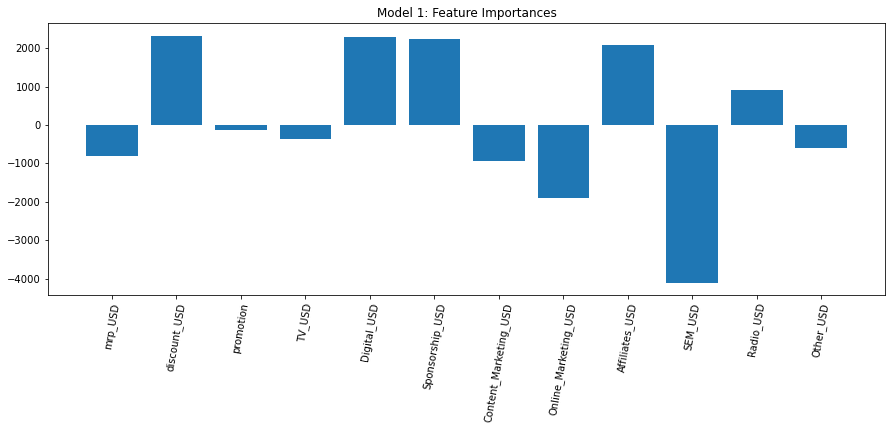

In [33]:
# plot feature importance
plt.figure(figsize=(15,5))
plt.bar(X_test_1.columns.to_list(),feature_importances['importance'])
plt.xticks(rotation=80)
plt.title('Model 1: Feature Importances')
plt.show()

#### Summary of Linear Regression Model 1 :
Baseline model using the option 1 data with monthly spend divided evenly across each day.
* Resulted in a high r-squared value with 96.01% of the variance in unit sales being predicted by the model. 
* The mean absolute error was relatively low at 586.08. 
* The root mean squared error was also relatively low at 758.66.
* A mapping of feature importances shows that (of the media spend variables) the SEM, digital, sponsorship, and affiliates spend were the strongest predictors of unit sales, although SEM had a strong negative impact.

#### Train Baseline Model Option 2

In [34]:
#Fit and train linear regression model
lr_model_2 = LinearRegression().fit(X_train_2_scaled, y_train_2)

#Generate predictions
y_train_2_pred = lr_model_2.predict(X_train_2_scaled)
y_test_2_pred = lr_model_2.predict(X_test_2_scaled)

In [35]:
#Model parameters
print('Weight coefficients: ',lr_model_2.coef_)

Weight coefficients:  [1983.17241356  685.9249898  -506.91950153   76.17802375   53.41335433
  140.68715118 -118.78621411  133.80354752  167.88226223   42.7938157
 -205.9732189    64.10762603]


#### Evaluate Baseline Model Option 2

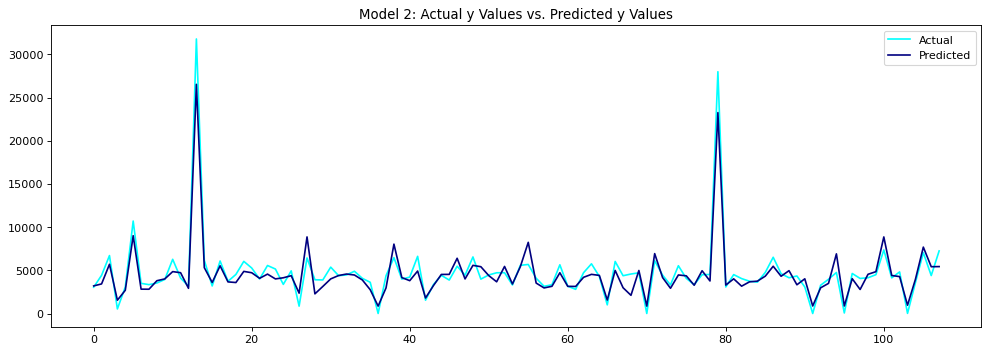

In [36]:
#Plot accuracy

# Creating Line Graph
plt.figure(num=None, figsize=(15, 5), dpi=80)
y1 = y_test_2.to_numpy()
y2 = y_test_2_pred
plt.plot(y1, label = 'Actual', color = 'aqua') 
plt.plot(y2, label = 'Predicted', color = 'navy')
plt.title('Model 2: Actual y Values vs. Predicted y Values')
plt.legend()
plt.show()

In [37]:
# Get r-squared value for training and test sets
r2_lr_2 = r2_score(y_train_2, y_train_2_pred), r2_score(y_test_2, y_test_2_pred)
r2_lr_2

(0.8464784268348527, 0.912085167057626)

In [38]:
# Get mean absolute error for training and test sets
mae_lr_2 = mean_absolute_error(y_train_2, y_train_2_pred), mean_absolute_error(y_test_2, y_test_2_pred)
mae_lr_2

(733.5743848509477, 810.8974698240634)

In [39]:
#Get mean squared error for training and test sets
mse_lr_2 = mean_squared_error(y_train_2, y_train_2_pred), mean_squared_error(y_test_2, y_test_2_pred)
mse_lr_2

(1038840.5627713236, 1296602.308311086)

In [40]:
#Get root mean squared error for training and test sets
np.sqrt(mse_lr_2)

array([1019.23528332, 1138.68446389])

Feature importances code below adapted from Machine Learning Mastery Article by Jason Brownlee [Source]('https://machinelearningmastery.com/calculate-feature-importance-with-python/')

In [41]:
#Create coeficients variable
coefficients = lr_model_2.coef_

#Create feature importances df
feature_importances = pd.DataFrame(coefficients, X_test_2.columns, columns = ['coefficient'])

#Get standard deviations for each feature
stdevs = []
for i in range(len(X_test_2.columns)):
    stdev = X_test_2_scaled[i].std()
    stdevs.append(stdev)
    
#Get avg. y-value
avg_y = y_test_2.mean()

#Create std column for each feature
feature_importances['std'] = np.array(stdevs).reshape(-1,1)
feature_importances['importance'] = feature_importances['std']* feature_importances['coefficient']
feature_importances['perc_change_y'] = ((feature_importances['importance'])/avg_y)*100
feature_importances.reindex(feature_importances['importance'].abs().sort_values(ascending=False).index)

,coefficient,std,importance,perc_change_y
promotion,-506.919502,1.260741,-639.094427,-13.492590
mrp_USD,1983.172414,0.255254,506.211803,10.687166
discount_USD,685.924990,0.558910,383.370250,8.093730
Radio_USD,-205.973219,1.057397,-217.795379,-4.598106
Sponsorship_USD,140.687151,1.227833,172.740287,3.646901
Content_Marketing_USD,-118.786214,0.832891,-98.935913,-2.088739
SEM_USD,42.793816,1.217914,52.119178,1.100342
Online_Marketing_USD,133.803548,0.331839,44.401201,0.937400
Affiliates_USD,167.882262,0.215241,36.135220,0.762888
Other_USD,64.107626,0.381703,24.470096,0.516614


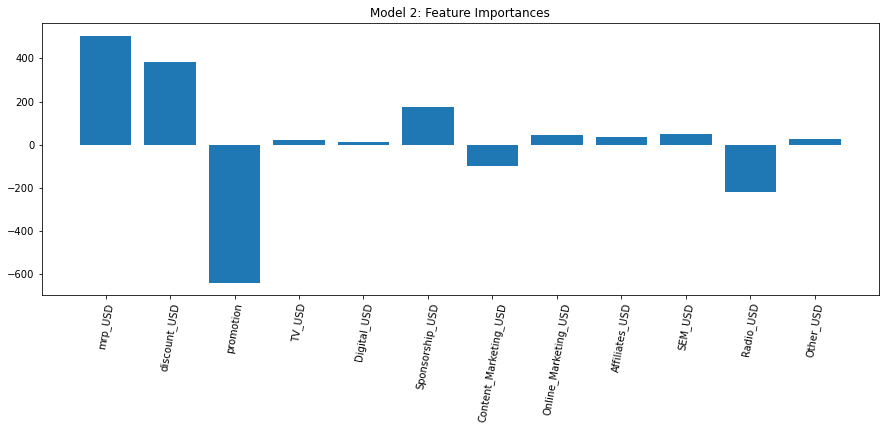

In [42]:
# plot feature importance
plt.figure(figsize=(15,5))
plt.bar(X_test_2.columns.to_list(),feature_importances['importance'])
plt.xticks(rotation=80)
plt.title('Model 2: Feature Importances')
plt.show()

#### Summary of Linear Regression Model 2:
Baseline model using the option 2 data with monthly media spend divided randomly across each day.
* Also resulted in a high r-squared value with 91.2% of the variance in unit sales being predicted by the model, but it was nearly 5 percentage points lower than the option 1 model.
* The mean absolute error was a bit higher than model 1 at 810.9 vs. 586.08. 
* The root mean squared error was also higher than model 1 at 1138.68 vs 758.66.
* The mapping of feature importances though gave very low weights to the media spend variables, with the radio and sponsorship spends being the highest (radio being a negative impact).

## F: Next Steps <a class="anchor" id="f"></a>

* Additional Models to test:
    * Ridge regression: good model choice for high multi-collinearity
    * Lasso regression: another good model choice for high multi-collinearity
* Identify key drivers of unit sales

In [43]:
#Save training and test sets to pickle
#Option 1
X_train_1.to_pickle('../b_Data/X_train_1.pkl')
y_train_1.to_pickle('../b_Data/y_train_1.pkl')
X_test_1.to_pickle('../b_Data/X_test_1.pkl')
y_test_1.to_pickle('../b_Data/y_test_1.pkl')

#Option 2
X_train_2.to_pickle('../b_Data/X_train_2.pkl')
y_train_2.to_pickle('../b_Data/y_train_2.pkl')
X_test_2.to_pickle('../b_Data/X_test_2.pkl')
y_test_2.to_pickle('../b_Data/y_test_2.pkl')

#Save linear regression models to pickle
file_name = '../b_Data/lr_model_1.pkl'
open_file = open(file_name, "wb")
pickle.dump(lr_model_1, open_file)
open_file.close()

file_name = '../b_Data/lr_model_2.pkl'
open_file = open(file_name, "wb")
pickle.dump(lr_model_2, open_file)
open_file.close()

